# Error analysis

In [ ]:
import torch

base_ds = datasets.ImageFolder('LEGO_brick_images_v1')

model = models.resnet18(pretrained=True)

model_path = "resources/model.pth"
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

correctly_classified = []
incorrectly_classified = []
for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    for i in range(len(labels)):
        if preds[i] == labels[i]:
            correctly_classified.append((images[i], base_ds.classes[preds[i]]))
        else:
            incorrectly_classified.append((images[i], base_ds.classes[preds[i]], base_ds.classes[labels[i]]))

RuntimeError: Error(s) in loading state_dict for ResNet:
	size mismatch for fc.weight: copying a param with shape torch.Size([16, 512]) from checkpoint, the shape in current model is torch.Size([1000, 512]).
	size mismatch for fc.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([1000]).

In [ ]:
import textwrap
import matplotlib.pyplot as plt

num = 10
def show_images(images, titles=None):
    plt.figure(figsize=(15, 10))
    for i, img in enumerate(images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.permute(1, 2, 0).cpu())
        if titles:
            # Wrap title to max 30 characters per line
            wrapped_title = "\n".join(textwrap.wrap(str(titles[i]), width=30))
            plt.title(wrapped_title, fontsize=10)
        plt.axis('off')
    plt.show()

show_images([img for img, _ in correctly_classified[:num]], [title for _, title in correctly_classified[:num]])
# show_images([img for img, _, _ in incorrectly_classified[:num]], [f"Pred: {pred}, True: {true}" for _, pred, true in incorrectly_classified[:num]])

NameError: name 'correctly_classified' is not defined

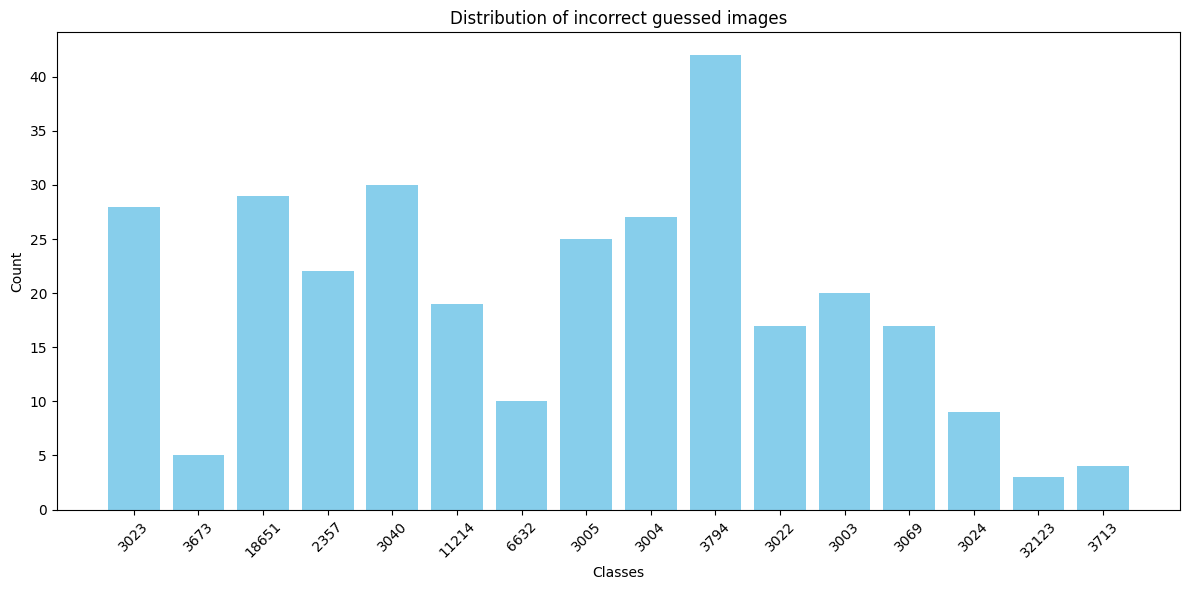

In [ ]:
# Lets make a bar chart
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# # Get list of predicted class names
# predicted_classes = [cls_name for _, cls_name in correctly_classified]

#INCORRECT classes
predicted_classes = [cls_name for _, _, cls_name in incorrectly_classified]

# Count occurrences
class_counts = Counter(predicted_classes)

# Plot distribution
plot_class_distribution(class_counts, "Distribution of incorrect guessed images")